In [1]:
!pip install fastdup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import shutil
import fastdup

# Đường dẫn đến dữ liệu gốc trên Google Drive
input_dir = '/content/drive/MyDrive/sports_data'

# Đường dẫn để lưu dữ liệu đã tiền xử lý
output_dir = '/content/drive/MyDrive/processed_sports_data'

# Đảm bảo thư mục đích đã được tạo
os.makedirs(output_dir, exist_ok=True)

In [4]:
# danh sách các nhãn
categories = ['badminton', 'cricket', 'karate', 'football', 'swimming', 'tennis', 'wrestling']

In [5]:
# kiểm tra số lượng ảnh ban đầu trước khi tiền xử lý
for category in categories:
    category_dir = os.path.join(input_dir, category)
    print(f"Nhãn {category}: {len(os.listdir(category_dir))} ảnh")

Nhãn badminton: 1394 ảnh
Nhãn cricket: 1556 ảnh
Nhãn karate: 613 ảnh
Nhãn football: 1188 ảnh
Nhãn swimming: 652 ảnh
Nhãn tennis: 1445 ảnh
Nhãn wrestling: 1471 ảnh


In [6]:
# lọc các ảnh trùng lặp
def process_duplicate_category(category_name, input_dir, output_dir):
    """
    Tiền xử lý dữ liệu cho từng nhãn:
    - Loại bỏ ảnh trùng lặp và bất thường bằng fastdup.
    - Chia dữ liệu thành train và test.
    """

    print(f"Đang xử lý nhãn: {category_name}")

    # đường dẫn đến thư mục của nhãn
    category_dir = os.path.join(input_dir, category_name)

    # phân tích trùng lặp bằng fastdup
    fd = fastdup.create(input_dir=category_dir, work_dir=f"AI_{category_name}")
    ## (high_accuracy=True): Kích hoạt chế độ phân tích với độ chính xác cao hơn.
    ## (overwrite=True): Cho phép ghi đè kết quả của các lần chạy trước.
    ## (nearest_neighbors_k=5): Đây là số nearest neighbors được sử dụng trong thuật toán phát hiện tương tự (similarity detection).
    fd.run(high_accuracy=True, overwrite=True, nearest_neighbors_k=5)

    # Lấy danh sách ảnh trùng lặp
    duplicate_imgs = set(fd.similarity().sort_values("distance")['filename_from'])

    # Lấy dánh sách tất cả các ảnh trong thư mục
    all_images = set(os.listdir(category_dir))

    # Lấy danh sách ảnh không trùng lặp
    unique_images = all_images - duplicate_imgs

    # Định dạng lại đường dẫn cho unique_images
    unique_images = [os.path.join(category_dir, img) for img in unique_images
                     if img.lower().endswith(('.jpeg', '.jpg', '.png'))]

    # Tạo thư mục đích cho nhãn
    output_category_dir = os.path.join(output_dir, category_name)
    os.makedirs(output_category_dir, exist_ok=True)

    # Di chuyển các ảnh không trùng lặp vào thư mục đích
    for img_path in unique_images:
        shutil.copy(img_path, output_category_dir)

    print(f"Hoàn thành xử lý trùng lặp nhãn: {category_name}")

In [7]:
# xử lý từng nhãn
for category in categories:
    process_duplicate_category(category, input_dir, output_dir)

print("Hoàn tất tiền xử lý dữ liệu trùng lặp!")

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Đang xử lý nhãn: badminton

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/badminton"
Work directory is set to "AI_badminton"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:42<00:24, 24.83s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:44<00:00, 14.88s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý trùng lặp nhãn: badminton
Đang xử lý nhãn: cricket

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/cricket"
Work directory is set to "AI_cricket"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:49<00:29, 29.01s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:51<00:00, 17.30s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý trùng lặp nhãn: cricket
Đang xử lý nhãn: karate

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/karate"
Work directory is set to "AI_karate"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:21<00:12, 12.56s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:23<00:00,  7.79s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý trùng lặp nhãn: karate
Đang xử lý nhãn: football

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/football"
Work directory is set to "AI_football"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:41<00:24, 24.24s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:43<00:00, 14.46s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý trùng lặp nhãn: football
Đang xử lý nhãn: swimming

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/swimming"
Work directory is set to "AI_swimming"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:22<00:13, 13.09s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:24<00:00,  8.04s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý trùng lặp nhãn: swimming
Đang xử lý nhãn: tennis

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/tennis"
Work directory is set to "AI_tennis"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:46<00:27, 27.07s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:48<00:00, 16.22s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý trùng lặp nhãn: tennis
Đang xử lý nhãn: wrestling

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/wrestling"
Work directory is set to "AI_wrestling"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:45<00:26, 26.79s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:47<00:00, 15.98s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Hoàn thành xử lý trùng lặp nhãn: wrestling
Hoàn tất tiền xử lý dữ liệu trùng lặp!


In [8]:
# kiểm tra số lượng ảnh còn lại trong mỗi nhãn sau khi lọc ảnh trùng lặp
for category in categories:
    category_dir = os.path.join(output_dir, category)
    print(f"Nhãn {category}: {len(os.listdir(category_dir))} ảnh")

Nhãn badminton: 1394 ảnh
Nhãn cricket: 1556 ảnh
Nhãn karate: 613 ảnh
Nhãn football: 1188 ảnh
Nhãn swimming: 652 ảnh
Nhãn tennis: 1445 ảnh
Nhãn wrestling: 1471 ảnh


In [10]:
# lọc các ảnh bất thường (outliers)

def process_outliers_category(category_name, input_dir, output_dir):
    """
    Xử lý từng nhãn:
    - Phát hiện và loại bỏ ảnh bất thường.
    """
    print(f"Đang xử lý nhãn: {category_name}")

    # Đường dẫn đến thư mục nhãn
    category_dir = os.path.join(input_dir, category_name)

    # Phân tích dữ liệu bằng fastdup
    fd = fastdup.create(input_dir=category_dir, work_dir=f"AI_{category_name}")
    fd.run(high_accuracy=True, overwrite=True)

    # Lấy danh sách ảnh bất thường
    outliers = fd.outliers()['filename_outlier']
    print(f"Tìm thấy {len(outliers)} ảnh bất thường trong nhãn {category_name}")

    # Xóa các ảnh bất thường
    for file in outliers:
        if os.path.exists(file):
            os.remove(file)
            print(f"Đã xóa: {file}")

    # Di chuyển ảnh còn lại vào thư mục đích
    output_category_dir = os.path.join(output_dir, category_name)
    os.makedirs(output_category_dir, exist_ok=True)
    for img in os.listdir(category_dir):
        img_path = os.path.join(category_dir, img)
        if img.lower().endswith(('.jpeg', '.jpg', '.png')):
            shutil.move(img_path, os.path.join(output_category_dir, img))

    print(f"Hoàn thành xử lý bất thường nhãn: {category_name}")
    return fd  # Trả về đối tượng fastdup

# Danh sách đối tượng fastdup của từng nhãn
fds = {}

In [11]:
# Xử lý từng nhãn
for category in categories:
    fds[category] = process_outliers_category(category, input_dir, output_dir)

print("Hoàn tất tiền xử lý dữ liệu bất thường!")

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Đang xử lý nhãn: badminton

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/badminton"
Work directory is set to "AI_badminton"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:43<00:25, 25.67s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:45<00:00, 15.31s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Tìm thấy 96 ảnh bất thường trong nhãn badminton
Đã xóa: drive/MyDrive/sports_data/badminton/ee6508bc72.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/87096582c1.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/ead523f2a6.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/08b6ea2143.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/f2ae0ccc3c.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/40250a515d.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/0559a5aa07.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/fa09ba543c.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/d6ad22dbec.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/31343b0ac2.jpg
Đã xóa: drive/MyDrive/sports_data/badminton/fd6eb80577.jpg
Đã xóa: d

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý bất thường nhãn: badminton
Đang xử lý nhãn: cricket

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/cricket"
Work directory is set to "AI_cricket"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:50<00:29, 29.42s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:53<00:00, 17.98s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Tìm thấy 111 ảnh bất thường trong nhãn cricket
Đã xóa: drive/MyDrive/sports_data/cricket/1506e455dc.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/c17.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/b4614bbd0b.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/3455c44896.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/6f5a719e8d.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/eed2f075c6.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/7b5ce59aa5.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/bb8e9d8db9.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/224a5c5b5b.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/1a77e4a2c5.jpg
Đã xóa: drive/MyDrive/sports_data/cricket/f8df6eaf77.jpg
Đã xóa: drive/MyDrive/sports_data/crick

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý bất thường nhãn: cricket
Đang xử lý nhãn: karate

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/karate"
Work directory is set to "AI_karate"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:20<00:12, 12.26s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:22<00:00,  7.66s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Tìm thấy 43 ảnh bất thường trong nhãn karate
Đã xóa: drive/MyDrive/sports_data/karate/c1004.jpg
Đã xóa: drive/MyDrive/sports_data/karate/3b8f71de6d.jpg
Đã xóa: drive/MyDrive/sports_data/karate/8fb3bbd60c.jpg
Đã xóa: drive/MyDrive/sports_data/karate/9311bd03f3.jpg
Đã xóa: drive/MyDrive/sports_data/karate/898ea7fd7d.jpg
Đã xóa: drive/MyDrive/sports_data/karate/c1009.jpg
Đã xóa: drive/MyDrive/sports_data/karate/735aa4138a.jpg
Đã xóa: drive/MyDrive/sports_data/karate/c1003.jpg
Đã xóa: drive/MyDrive/sports_data/karate/85baea6ca9.jpg
Đã xóa: drive/MyDrive/sports_data/karate/ddb83cbd3c.jpg
Đã xóa: drive/MyDrive/sports_data/karate/3b2b742b58.jpg
Đã xóa: drive/MyDrive/sports_data/karate/3249c91f86.jpg
Đã x

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý bất thường nhãn: karate
Đang xử lý nhãn: football

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/football"
Work directory is set to "AI_football"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:40<00:23, 23.73s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:42<00:00, 14.23s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Tìm thấy 85 ảnh bất thường trong nhãn football
Đã xóa: drive/MyDrive/sports_data/football/18ffcd551e.jpg
Đã xóa: drive/MyDrive/sports_data/football/9d3de05692.jpg
Đã xóa: drive/MyDrive/sports_data/football/a285eba419.jpg
Đã xóa: drive/MyDrive/sports_data/football/61b01d675c.jpg
Đã xóa: drive/MyDrive/sports_data/football/a2f357c4bf.jpg
Đã xóa: drive/MyDrive/sports_data/football/9a607a1584.jpg
Đã xóa: drive/MyDrive/sports_data/football/c9e4eb6aac.jpg
Đã xóa: drive/MyDrive/sports_data/football/4a38142f16.jpg
Đã xóa: drive/MyDrive/sports_data/football/7f6f79e353.jpg
Đã xóa: drive/MyDrive/sports_data/football/c5354d8cb4.jpg
Đã xóa: drive/MyDrive/sports_data/football/734ffd5761.jpg
Đã xóa: drive/MyDrive

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý bất thường nhãn: football
Đang xử lý nhãn: swimming

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/swimming"
Work directory is set to "AI_swimming"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:21<00:12, 12.38s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:22<00:00,  7.64s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Tìm thấy 53 ảnh bất thường trong nhãn swimming
Đã xóa: drive/MyDrive/sports_data/swimming/1bf6731a34.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/614138a6b6.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/fbc70aa01c.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/fae3ae4d70.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/59146d21d1.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/3b90b9f115.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/68f029108c.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/4ad6cc10d6.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/1e6a2d5614.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/76bede4f33.jpg
Đã xóa: drive/MyDrive/sports_data/swimming/619e8b5ad6.jpg
Đã xóa: drive/MyDrive

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý bất thường nhãn: swimming
Đang xử lý nhãn: tennis

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/tennis"
Work directory is set to "AI_tennis"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:47<00:27, 27.96s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:51<00:00, 17.11s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Tìm thấy 98 ảnh bất thường trong nhãn tennis
Đã xóa: drive/MyDrive/sports_data/tennis/42e9891221.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/e78eae0d9b.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/6d655af337.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/1045261517.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/ba24def98e.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/89a6ae23ef.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/24e05b329b.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/097cdfa562.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/07eab9352a.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/5f38824b6f.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/2f81b3e51b.jpg
Đã xóa: drive/MyDrive/sports_data/tennis/c84e

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Hoàn thành xử lý bất thường nhãn: tennis
Đang xử lý nhãn: wrestling

fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "/content/drive/MyDrive/sports_data/wrestling"
Work directory is set to "AI_wrestling"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [00:48<00:28, 28.65s/it]/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:210: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_annot = self._df_annot.query(f'{FD.ANNOT_VALID}') if valid_only and self._df_annot is not None \
Done: 100%|██████████| 3/3 [00:51<00:00, 17.05s/it]



Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.

Tìm thấy 116 ảnh bất thường trong nhãn wrestling
Đã xóa: drive/MyDrive/sports_data/wrestling/0c4b6db7c6.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/c9004c06f4.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/b8e461ed8b.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/2eb9c04b95.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/c6c7f444dd.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/c8004.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/e88320c906.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/5406eda401.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/b52d7d1952.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/47f1f5d75d.jpg
Đã xóa: drive/MyDrive/sports_data/wrestling/8960280850.jpg
Đã xóa: drive

In [12]:
# kiểm tra số lượng ảnh còn lại trong mỗi nhãn sau khi lọc ảnh bất thường
for category in categories:
    category_dir = os.path.join(output_dir, category)
    print(f"Nhãn {category}: {len(os.listdir(category_dir))} ảnh")

Nhãn badminton: 1394 ảnh
Nhãn cricket: 1556 ảnh
Nhãn karate: 613 ảnh
Nhãn football: 1188 ảnh
Nhãn swimming: 652 ảnh
Nhãn tennis: 1445 ảnh
Nhãn wrestling: 1471 ảnh


Hiển thị ảnh bất thường cho nhãn: badminton


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Failed to read image from img_path drive/MyDrive/sports_data/badminton/ee6508bc72.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/87096582c1.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/ead523f2a6.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/f2ae0ccc3c.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/40250a515d.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/fa09ba543c.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/31343b0ac2.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/358c149fb9.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/08b6ea2143.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/76eafa96a2.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/badminton/ee6508bc72.jpg /content/drive/MyDrive/sports_data/badminton
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/badminton/87096582c1.jpg /content/drive/MyDrive/sports_data/badminton
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from driv

Failed to read image from img_path drive/MyDrive/sports_data/badminton/d6ad22dbec.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/b7a2097352.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/0559a5aa07.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/06540352ad.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/f4456c2d50.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/868e209c3f.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/7f8292c33b.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/3936236487.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/2f32eba567.jpg
Failed to read image from img_path drive/MyDrive/sports_data/badminton/18c5df9680.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/badminton/d6ad22dbec.jpg /content/drive/MyDrive/sports_data/badminton
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/badminton/b7a2097352.jpg /content/drive/MyDrive/sports_data/badminton
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from driv

Stored outliers visual view in  AI_badminton/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



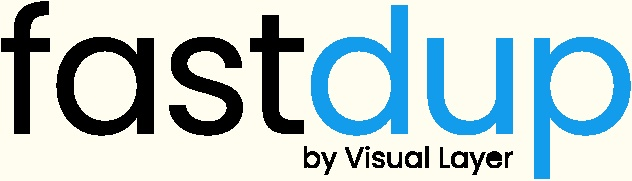

Hiển thị ảnh bất thường cho nhãn: cricket


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Failed to read image from img_path drive/MyDrive/sports_data/cricket/1506e455dc.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/c17.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/b4614bbd0b.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/eed2f075c6.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/7b5ce59aa5.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/6f5a719e8d.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/3455c44896.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/1a77e4a2c5.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/f8df6eaf77.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/224a5c5b5b.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/cricket/1506e455dc.jpg /content/drive/MyDrive/sports_data/cricket
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/cricket/c17.jpg /content/drive/MyDrive/sports_data/cricket
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sport

Failed to read image from img_path drive/MyDrive/sports_data/cricket/a33a64fee4.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/bb8e9d8db9.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/4b0bc07882.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/a3f6e899da.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/1fce84d492.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/484666d6bf.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/7c6629f599.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/cf20a5aba5.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/ba4ee26825.jpg
Failed to read image from img_path drive/MyDrive/sports_data/cricket/26f53c8ca7.jpg
Stored outliers visual view in  AI_cricket/galleries/outliers.html
########################################################################################
Woul

  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/cricket/224a5c5b5b.jpg /content/drive/MyDrive/sports_data/cricket
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/cricket/a33a64fee4.jpg /content/drive/MyDrive/sports_data/cricket
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/cricket/bb8e9d8db9.jp


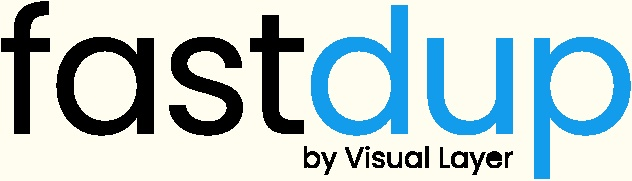

Hiển thị ảnh bất thường cho nhãn: karate


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Failed to read image from img_path drive/MyDrive/sports_data/karate/c1004.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/3b8f71de6d.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/8fb3bbd60c.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/9311bd03f3.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/898ea7fd7d.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/c1009.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/735aa4138a.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/85baea6ca9.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/ddb83cbd3c.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/3b2b742b58.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/8aa75c1544.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/karate/c1004.jpg /content/drive/MyDrive/sports_data/karate
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/karate/3b8f71de6d.jpg /content/drive/MyDrive/sports_data/karate
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_

Failed to read image from img_path drive/MyDrive/sports_data/karate/21a811c5ce.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/c1003.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/5f023bc97b.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/d77d5629ed.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/4653964268.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/2cc02d5f10.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/9581e1136d.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/751b6904bb.jpg
Failed to read image from img_path drive/MyDrive/sports_data/karate/f66520c8bd.jpg
Stored outliers visual view in  AI_karate/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/karate/21a811c5ce.jpg /content/drive/MyDrive/sports_data/karate
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/karate/c1003.jpg /content/drive/MyDrive/sports_data/karate
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_


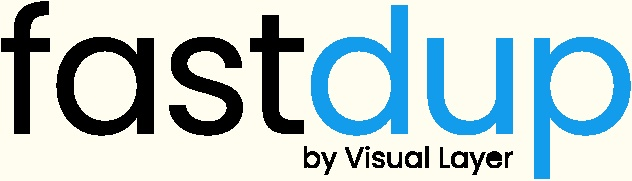

Hiển thị ảnh bất thường cho nhãn: football


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Failed to read image from img_path drive/MyDrive/sports_data/football/9d3de05692.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/61b01d675c.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/c9e4eb6aac.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/4a38142f16.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/7f6f79e353.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/a285eba419.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/734ffd5761.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/c5354d8cb4.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/64c83d6d34.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/82b7d5c2da.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/football/9d3de05692.jpg /content/drive/MyDrive/sports_data/football
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/football/61b01d675c.jpg /content/drive/MyDrive/sports_data/football
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/My

Failed to read image from img_path drive/MyDrive/sports_data/football/8e40382093.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/a2f357c4bf.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/c2035.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/19dfe2dddc.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/fe7aa3af05.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/9a607a1584.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/a4123d002a.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/fc8d63220c.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/football/8e40382093.jpg /content/drive/MyDrive/sports_data/football
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/football/a2f357c4bf.jpg /content/drive/MyDrive/sports_data/football
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/My

Failed to read image from img_path drive/MyDrive/sports_data/football/a4db62fa26.jpg
Failed to read image from img_path drive/MyDrive/sports_data/football/5e895fcc86.jpg
Stored outliers visual view in  AI_football/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/football/a4db62fa26.jpg /content/drive/MyDrive/sports_data/football
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/football/5e895fcc86.jpg /content/drive/MyDrive/sports_data/football



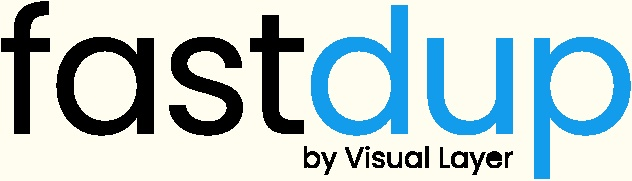

Hiển thị ảnh bất thường cho nhãn: swimming


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Failed to read image from img_path drive/MyDrive/sports_data/swimming/1bf6731a34.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/614138a6b6.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/fbc70aa01c.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/fae3ae4d70.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/59146d21d1.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/3b90b9f115.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/68f029108c.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/4ad6cc10d6.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/619e8b5ad6.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/a837d63e34.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/169be9bfda.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swim

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/swimming/1bf6731a34.jpg /content/drive/MyDrive/sports_data/swimming
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/swimming/614138a6b6.jpg /content/drive/MyDrive/sports_data/swimming
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/My

Failed to read image from img_path drive/MyDrive/sports_data/swimming/1e6a2d5614.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/76bede4f33.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/ca38ffe010.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/157c299a95.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/42edb37438.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/063330a554.jpg


AssertionError: Failed to read image from drive/MyDrive/sports_data/swimming/b65062fa7f.jpg /content/drive/MyDrive/sports_data/swimming
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/swimming/1e6a2d5614.jpg /content/drive/MyDrive/sports_data/swimming
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/swimming/76bede4f33.jpg /content/drive/MyDrive/sports_data/swimming
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_ou

Failed to read image from img_path drive/MyDrive/sports_data/swimming/36e898dd84.jpg
Failed to read image from img_path drive/MyDrive/sports_data/swimming/a2c0f03654.jpg
Stored outliers visual view in  AI_swimming/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



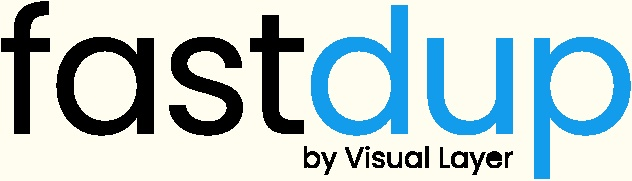

Hiển thị ảnh bất thường cho nhãn: tennis


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Failed to read image from img_path drive/MyDrive/sports_data/tennis/42e9891221.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/6d655af337.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/24e05b329b.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/1045261517.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/5f38824b6f.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/89a6ae23ef.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/2f81b3e51b.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/c84e9e109a.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/ab43dbdbf7.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/tennis/42e9891221.jpg /content/drive/MyDrive/sports_data/tennis
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/tennis/6d655af337.jpg /content/drive/MyDrive/sports_data/tennis
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sp

Failed to read image from img_path drive/MyDrive/sports_data/tennis/097cdfa562.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/e1e2a7e4c0.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/bc93a15ac0.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/31a0d78cbf.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/c620af3913.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/779988fdb3.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/2ebecfe199.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/23b18a929a.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/422833d4d1.jpg
Failed to read image from img_path drive/MyDrive/sports_data/tennis/dca30e2998.jpg


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/tennis/097cdfa562.jpg /content/drive/MyDrive/sports_data/tennis
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/tennis/e1e2a7e4c0.jpg /content/drive/MyDrive/sports_data/tennis
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sp

Failed to read image from img_path drive/MyDrive/sports_data/tennis/4c88415a39.jpg
Stored outliers visual view in  AI_tennis/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/tennis/4c88415a39.jpg /content/drive/MyDrive/sports_data/tennis



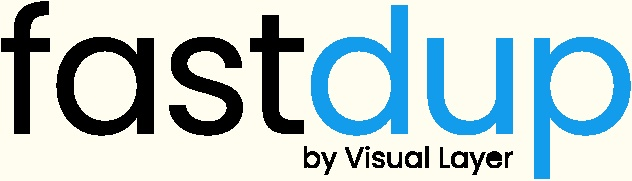

Hiển thị ảnh bất thường cho nhãn: wrestling


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Failed to read image from img_path drive/MyDrive/sports_data/wrestling/0c4b6db7c6.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/b8e461ed8b.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/c6c7f444dd.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/2eb9c04b95.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/c8004.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/c9004c06f4.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/5406eda401.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/b52d7d1952.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/8960280850.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/3c8fee00b0.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/3760663aaf.jpg
Failed to read image from img_path drive/MyDrive/sports_dat

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/wrestling/0c4b6db7c6.jpg /content/drive/MyDrive/sports_data/wrestling
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/wrestling/b8e461ed8b.jpg /content/drive/MyDrive/sports_data/wrestling
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from driv

Failed to read image from img_path drive/MyDrive/sports_data/wrestling/e88320c906.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/6bd5d600c4.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/d03ed14be3.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/e25ab4d01a.jpg
Failed to read image from img_path drive/MyDrive/sports_data/wrestling/a682b9aef7.jpg
Stored outliers visual view in  AI_wrestling/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/wrestling/e88320c906.jpg /content/drive/MyDrive/sports_data/wrestling
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from drive/MyDrive/sports_data/wrestling/6bd5d600c4.jpg /content/drive/MyDrive/sports_data/wrestling
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastdup/galleries.py", line 496, in load_one_image_for_outliers
    assert img is not None, f"Failed to read image from {impath1} {input_dir}"
AssertionError: Failed to read image from driv


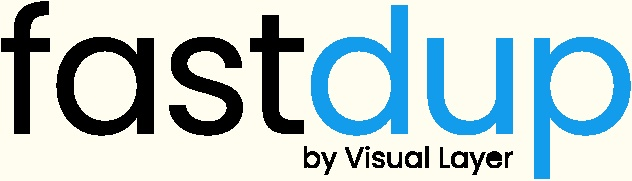

In [13]:
# Hiển thị ảnh bất thường cho từng nhãn
for category, fd in fds.items():
    print(f"Hiển thị ảnh bất thường cho nhãn: {category}")
    fd.vis.outliers_gallery(ascending=True)